In [35]:
from scipy.io import netcdf
from scipy.io import loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
sys.path.append('/noc/users/am8e13/Python/python_functions/')
import barotropic 
import topostrophy
import readfiles
import heatbalance

In [36]:
times = [181,186,192,212,233,263]
run_pert = readfiles.StateRead()        
run_pert.readData('/scratch/general/am8e13/results_restore/',times)
run_pert.title('The perturbation run')
run_pert.baroCalc()
run_pert.topoCalc()

In [37]:
def plot_field(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    
    for ax in axes.flat:        
        ax.set_title("T = "+str(np.round(run_pert.years[i],2))+" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca , ax=ax, )
        cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
        i=i+1
        
    fig.subplots_adjust(right=2.4,top=2)

In [38]:
times = np.array(range(20))
run_18km = readfiles.StateRead()        
run_18km.readData('/hpcdata/scratch/am8e13/arctic420x384/run_newobcs/results/',times)
run_18km.title('The perturbation run')
run_18km.baroCalc()
run_18km.topoCalc()

run_36km = readfiles.StateRead()        
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_newdownloaded_obcs/results/',times)
run_36km.title('The perturbation run')
run_36km.baroCalc()
run_36km.topoCalc()

In [39]:
run_36km_topo_ave = np.nanmean(run_36km.topo,axis=0)
run_36km_topo_opposit_ave = np.nanmean(run_36km.topo_opposit,axis=0)
run_18km_topo_ave = np.nanmean(run_18km.topo,axis=0)
run_18km_topo_opposit_ave = np.nanmean(run_18km.topo_opposit,axis=0)

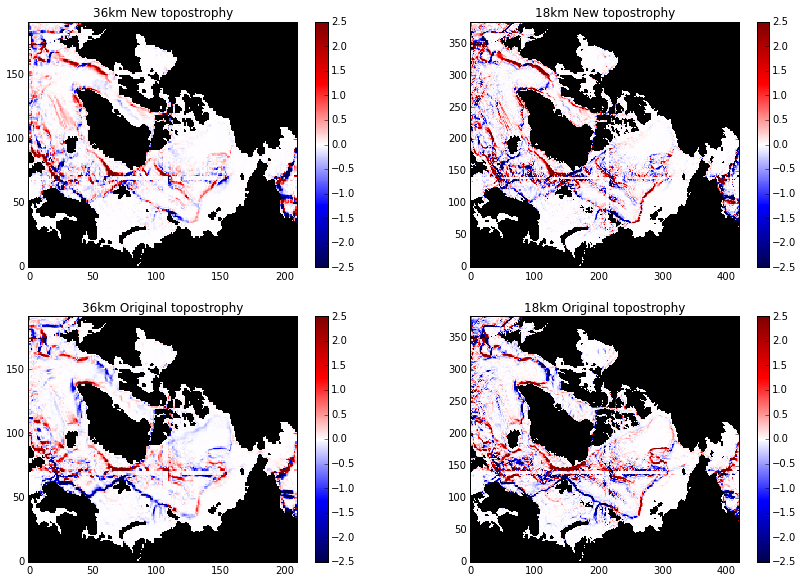

In [40]:
fig,axes = plt.subplots(2,2)
cmap= matplotlib.cm.seismic
cmap.set_bad('black',1.)
vimin = -2.5
vimax = 2.5
masked_array = np.ma.array(np.nanmean(run_36km_topo_opposit_ave,axis=0), mask=np.isnan(np.nanmean(run_36km_topo_opposit_ave,axis=0)))
ca = axes[0,0].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
cbar = fig.colorbar(ca , ax=axes[0,0], )
axes[0,0].set_title('36km New topostrophy')
masked_array = np.ma.array(np.nanmean(run_18km_topo_opposit_ave,axis=0), mask=np.isnan(np.nanmean(run_18km_topo_opposit_ave,axis=0)))
ca = axes[0,1].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
cbar = fig.colorbar(ca , ax=axes[0,1], )
axes[0,1].set_title('18km New topostrophy')
masked_array = np.ma.array(np.nanmean(run_36km_topo_ave,axis=0), mask=np.isnan(np.nanmean(run_36km_topo_ave,axis=0)))
ca = axes[1,0].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
cbar = fig.colorbar(ca , ax=axes[1,0], )
axes[1,0].set_title('36km Original topostrophy')
masked_array = np.ma.array(np.nanmean(run_18km_topo_ave,axis=0), mask=np.isnan(np.nanmean(run_18km_topo_ave,axis=0)))
ca = axes[1,1].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
axes[1,1].set_title('18km Original topostrophy')
fig.subplots_adjust(right=2,top=2)
cbar = fig.colorbar(ca , ax=axes[1,1], )

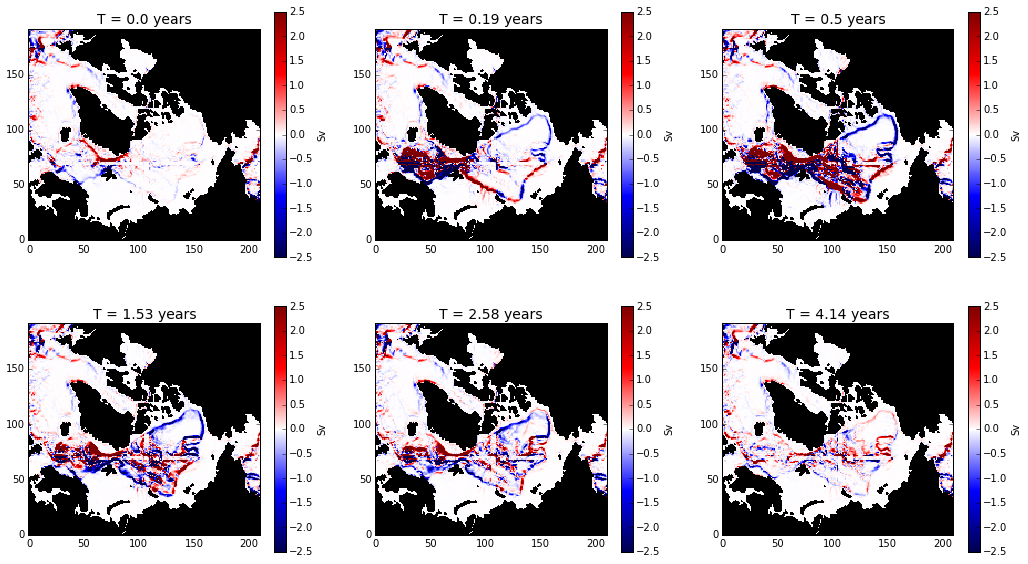

In [41]:
plot_field(np.nanmean(run_pert.topo,axis=1),-2.5,2.5,matplotlib.cm.seismic,'black','Sv')

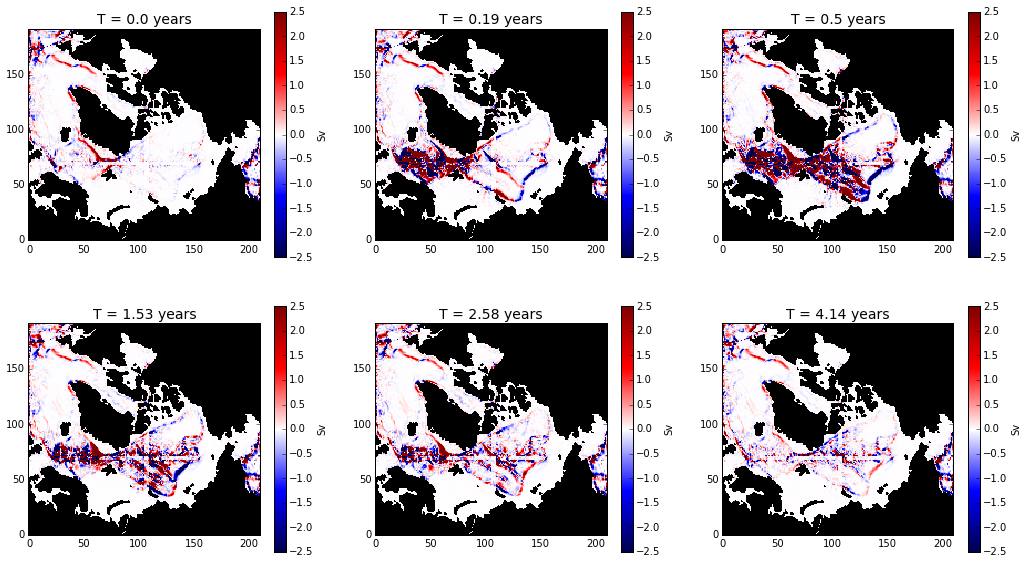

In [42]:
plot_field(np.nanmean(run_pert.topo_opposit,axis=1),-2.5,2.5,matplotlib.cm.seismic,'black','Sv')

In [43]:
alldata = {'run_18km_topo_ave': run_18km_topo_ave, 'run_18km_topo_opposit_ave': run_18km_topo_opposit_ave, \
          'run_36km_topo_ave': run_36km_topo_ave, 'run_36km_topo_opposit_ave': run_36km_topo_opposit_ave}
title = {'run_18km_topo_ave': '18km Original Topostrophy', 'run_18km_topo_opposit_ave': '18km New Topostrophy', \
          'run_36km_topo_ave': '36km Original Topostrophy', 'run_36km_topo_opposit_ave': '36km New Topostrophy'}

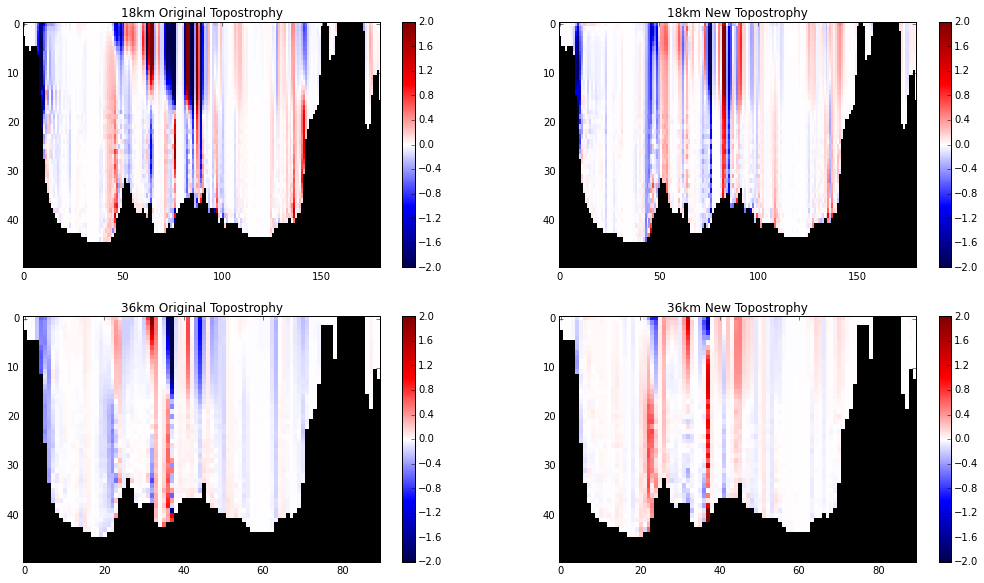

In [44]:
def plot_topostrophy_run(vimin,vimax,cmap,setbad,unity,origin,x0,x1,y0,y1):
    ord_var = ['run_18km_topo_ave','run_18km_topo_opposit_ave','run_36km_topo_ave','run_36km_topo_opposit_ave']
    fig, axes = plt.subplots(nrows=2, ncols=2)        
    vimin = vimin
    vimax = vimax
    ax_ind=0
    for var in ord_var:
        if alldata[var].shape[2]==210:
            res = 36
            ii = 1
        elif alldata[var].shape[2]==420:
            res = 18
            ii = 2
        else:
            print 'wrong dimensions'
        axes.flat[ax_ind].set_title(str(title[var]))
        if x0 == x1:
            temp  = alldata[var][:,x0*ii,y0*ii:y1*ii]
        elif y0 == y1:
            temp  = alldata[var][:,x0*ii:x1*ii,y0*ii]
        masked_array = np.ma.array(temp, mask=np.isnan(temp))
        cmap=cmap
        cmap.set_bad(setbad,1.)
        ca = axes.flat[ax_ind].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest', \
                    cmap = cmap ,origin= origin, aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        cbar.ax.set_ylabel(unity)
        ax_ind = ax_ind + 1
    fig.subplots_adjust(right=2.4,top=2)
plot_topostrophy_run(-2,2,matplotlib.cm.seismic,'black','','upper',30,120,125,125)

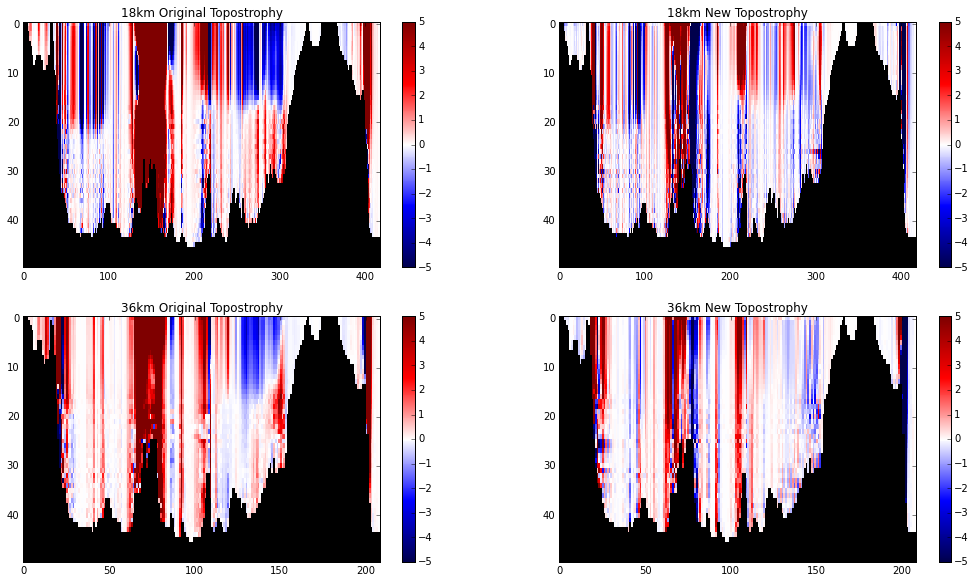

In [45]:
plot_topostrophy_run(-5,5,matplotlib.cm.seismic,'black','','upper',72,72,0,209)

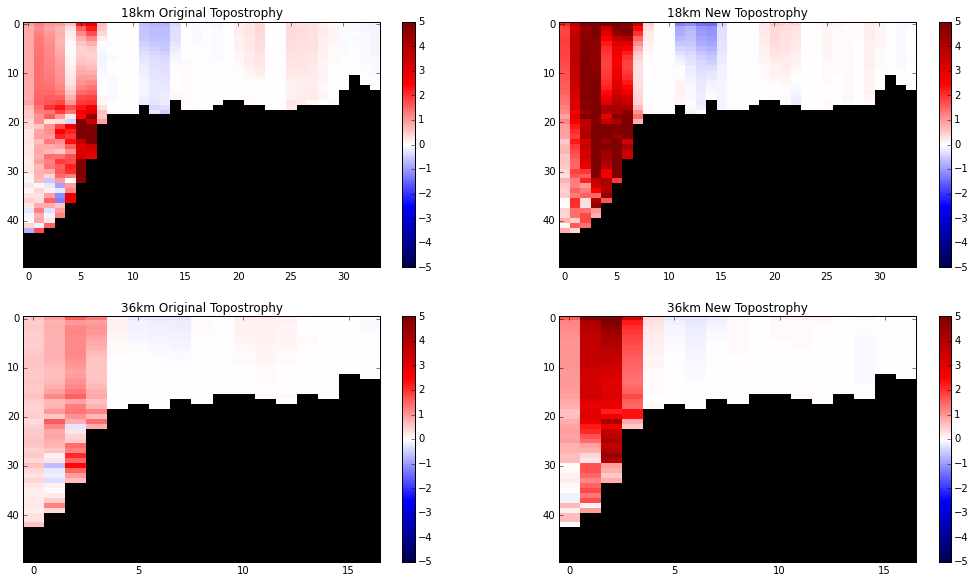

In [46]:
plot_topostrophy_run(-5,5,matplotlib.cm.seismic,'black','','upper',76,76,60,77)


In [47]:
#plot_field(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(S[:,0:5,:,:],axis=1),25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert.psi,-200,200,matplotlib.cm.seismic,'black','Sv')
#plot_field(np.mean(storeggaBig[:,30:40,:,:],axis=1),0,20,matplotlib.cm.hot,'grey','mol C/m ')

<matplotlib.colorbar.Colorbar instance at 0x2b1be9417ea8>

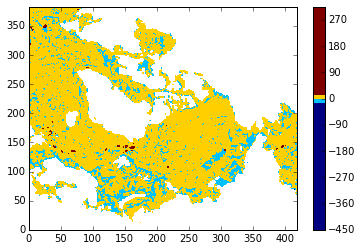

In [172]:
## This function is meant to rewrite topostrophy in the form T(H,d) with H the maximum 
## depth and d the depth in the point
Topostrophy = run_18km_topo_ave#np.nanmean(run_pert.topo,axis=0)#
# Calculate the first nan point in the surface:
Toposurf = np.array(Topostrophy[0,:,:])
iz = 0 
for ix in range(Topostrophy.shape[2]):
    for iy in range(Topostrophy.shape[1]):
        iz = 0
        while (iz < 50) and (~np.isnan(Topostrophy[iz,iy,ix])):
            Toposurf[iy,ix] = iz
            iz += 1
            
Topo_depth = np.ndarray([50,50])
for iz in range(Topostrophy.shape[0]):
    if iz == 24:
        Topo_depth = np.mean(Topostrophy[:,Toposurf==iz],axis=1)

Topo_bottom = np.array(Topostrophy[0,:,:])
for ix in range(Topostrophy.shape[2]):
    for iy in range(Topostrophy.shape[1]):
        if np.isnan(Toposurf[iy,ix]):
            Topo_bottom[iy,ix] = np.nan
        elif ~np.isnan(Toposurf[iy,ix]):
            Topo_bottom[iy,ix] = Topostrophy[Toposurf[iy,ix],iy,ix]
            
plt.contourf(Topo_bottom,50,vmin=-20,vmax=20)
plt.colorbar()

In [48]:
times = range(160,280,1)
def plot_field_gif(field,vimin,vimax,cmap,setbad,unity,title):
    # Salt contentration evolution
    
    #i=3
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for i in range(len(times)):
        
        ax.set_title("T = "+str(floor((days[times[i]]-days[0])/t*10)/10) +" years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(S_pert_top[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
    
        
    #fig.subplots_adjust(right=2,top=1.6)
        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'

In [49]:
#plot_field_gif(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C','surftemp')
#plot_field_gif(S_pert_top - S_np_top_ave,0,10,matplotlib.cm.hot,'grey','psu','salt_anom') 
#plot_field_gif(ETA - ETA_np_tot,-2,2,matplotlib.cm.coolwarm,'black','m','ETA')
#plot_field_gif(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C','tempsurf')
#plot_field_gif(np.mean(S[:,0:5,:,:],axis=1),25,37,matplotlib.cm.winter,'black','psu','saltsurf')
#plot_field_gif(psi_nan,-200,200,matplotlib.cm.seismic,'black','Sv','barostream')

In [50]:
x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("ptracers.nc",'r')
#storeggaBig=file2read.variables['storeggaBig']
#storeggaBig=storeggaBig[:]*1
daysStoregga=file2read.variables['T']
daysStoregga=daysStoregga[:]*1

In [51]:
def plot_field_1(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    for ax in axes.flat:
        ax.set_title("T = "+str(timesste[i]) +"years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(salt1))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        #cbar = fig.colorbar(ca , ax=ax, )
        #cbar.ax.set_ylabel(unity)
        i=i+1
    fig.subplots_adjust(right=2.4,top=1)

plot_field_1(salt,0,10,matplotlib.cm.jet,'grey','psu')     

NameError: name 'salt' is not defined

In [ ]:
x="/scratch/general/am8e13/results2_Salt36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_pert=file2read.variables['S']
S_pert=S_pert[:]*1
days_pert=file2read.variables['T']
days_pert=days[:]*1

x="/scratch/general/am8e13/results2_blownupfull/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_blown=file2read.variables['S']
S_blown=S_blown[:]*1
days_blown=file2read.variables['T']
days_blown=days_blown[:]*1

x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_np=file2read.variables['S']
S_np=S_np[:]*1
days_np=file2read.variables['T']
days_np=days_np[:]*1

x="/scratch/general/am8e13/results_restore"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_restore=file2read.variables['S']
S_restore=S_restore[:]*1
days_restore=file2read.variables['T']
days_restore=days_restore[:]*1

dZ = np.zeros(len(Z)-1)
dZ[:] = Z[0:len(Z)-1] - Z[1:len(Z)]
#plot(dZ)



In [ ]:
S_pert_quant = np.sum(S_pert, axis=2)
S_pert_quant = np.sum(S_pert_quant, axis=2)
S_pert_quant_a = np.dot(S_pert_quant[:,0:49],dZ)
# S_pert_quant_a total salt volume in m3

S_blown_quant = np.sum(S_blown, axis=2)
S_blown_quant = np.sum(S_blown_quant, axis=2)
S_blown_quant_a = np.dot(S_blown_quant[:,0:49],dZ)

S_np_quant = np.sum(S_np, axis=2)
S_np_quant = np.sum(S_np_quant, axis=2)
S_np_quant_a = np.dot(S_np_quant[:,0:49],dZ)

S_restore_quant = np.sum(S_restore, axis=2)
S_restore_quant = np.sum(S_restore_quant, axis=2)
S_restore_quant_a = np.dot(S_restore_quant[:,0:49],dZ)

S_input = np.array(S_np)
S_input[:,36:44,67:83,34:42,]=100
            
S_input_quant = np.sum(S_input, axis=2)
S_input_quant = np.sum(S_input_quant, axis=2)
S_input_quant_a = np.dot(S_input_quant[:,0:49],dZ)

#plt.plot(S_pert_quant_a,'r--',S_input_quant_a,'b',S_np_quant_a,'g',S_blown_quant_a,'b--',S_restore_quant_a,'g--')
quant, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_input_quant_a[0:100],'violet',label = 'Target volume')
pert, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_pert_quant_a[0:100],'r',label = 'tau_S = 1day, S_max = 50psu')
nprun, = plt.plot((days_np[0:100] - days_np[0])/t,S_np_quant_a[0:100],'g',label = 'No restoring')
blown, = plt.plot((days_blown[0:60] - days_blown[0])/t,S_blown_quant_a[0:60],'b',label = 'tau_S = 500days, S_max = 100psu')
restore, = plt.plot((days_restore[180:420]-days_restore[180])/t,S_restore_quant_a[180:420],'black',label = 'tau_S = 25 days, S_max = 100psu')
#set_title("Salt volume evolution")
plt.xlabel('Years after perturbation start')
plt.ylabel('Salt Volume')
plt.legend(handles=[quant,pert,nprun,blown,restore])#,['Stable Pert','Target volume','Non pert run','Almost stable pert','Unstable run'])
plt.subplots_adjust(right=1.4,top=1.4)

In [ ]:
dZ = np.zeros(len(Z)-1)
dZ[:] = Z[0:len(Z)-1] - Z[1:len(Z)]
#plot(dZ)

S_pert_quant = np.nansum(S, axis=2)
S_pert_quant = np.nansum(S_pert_quant, axis=2)
S_pert_quant_a = np.dot(S_pert_quant[:,0:49],dZ)

fig, ax = subplots()
ax.plot((days[0:400]-days[0])/t,S_pert_quant_a[0:400],'black')


In [ ]:
fig, ax = plt.subplots()
ax.plot((days[0:400]-days[0])/t,S_pert_quant_a[0:400],'black')
ax.set_xlabel('Years')
ax.set_title('Total salt sum')

In [ ]:
x="/scratch/general/am8e13/results_restore"
os.chdir(x)

theta_mean_tot =[]
theta_max_tot =[]
theta_min_tot =[]

eta_mean_tot =[]
eta_max_tot =[]
eta_min_tot =[]

salt_mean_tot =[]
salt_max_tot =[]
salt_min_tot =[]

sss_mean_tot =[]
sss_max_tot =[]
sss_min_tot =[]

sst_mean_tot =[]
sst_max_tot =[]
sst_min_tot =[]

vvel_mean_tot =[]
vvel_max_tot =[]
vvel_min_tot =[]

uvel_mean_tot =[]
uvel_max_tot =[]
uvel_min_tot =[]

ke_mean_tot =[]
ke_max_tot =[]
ke_vol_tot =[]

seaice_area_max_tot = []
seaice_area_min_tot = []
seaice_area_mean_tot = []

seaice_heff_max_tot = []
seaice_heff_min_tot = []
seaice_heff_mean_tot = []

time_seconds_tot = []

theta_lv_mean_tot =np.zeros([1,1,50])
theta_lv_max_tot =np.zeros([1,1,50])
theta_lv_min_tot =np.zeros([1,1,50])

salt_lv_mean_tot =np.zeros([1,1,50])
salt_lv_max_tot =np.zeros([1,1,50])
salt_lv_min_tot =np.zeros([1,1,50])

vvel_lv_mean_tot =np.zeros([1,1,50])
vvel_lv_max_tot =np.zeros([1,1,50])
vvel_lv_min_tot =np.zeros([1,1,50])

uvel_lv_mean_tot =np.zeros([1,1,50])
uvel_lv_max_tot =np.zeros([1,1,50])
uvel_lv_min_tot =np.zeros([1,1,50])

ke_lv_mean_tot =np.zeros([1,1,50])
ke_lv_max_tot =np.zeros([1,1,50])

time_lv_tot = []

#009059040.t001.nc      monitor_ptracer.0010069920.t001.nc 
#dynDiag.nc                          monitor_exf.0009564480

for iter in [10069920,10588320,10614240,10717920,10743840,11262240]:
    if iter > 10000000:
        file2read1 = netcdf.NetCDFFile("monitor.00"+str(iter)+".t001.nc",'r')
        file2read2 = netcdf.NetCDFFile("dynStDiag.00"+str(iter)+".t001.nc",'r')
        file2read3 = netcdf.NetCDFFile("monitor_seaice.00"+str(iter)+".t001.nc",'r')
    elif iter < 10000000:
        file2read1 = netcdf.NetCDFFile("monitor.000"+str(iter)+".t001.nc",'r')
        file2read2 = netcdf.NetCDFFile("dynStDiag.000"+str(iter)+".t001.nc",'r')
        file2read3 = netcdf.NetCDFFile("monitor_seaice.000"+str(iter)+".t001.nc",'r')
        
    time_seconds = file2read1.variables['time_secondsf']
    time_seconds=time_seconds[:]*1
    
    theta_mean=file2read1.variables['dynstat_theta_mean']
    theta_mean=theta_mean[:]*1    
    theta_max=file2read1.variables['dynstat_theta_max']
    theta_max=theta_max[:]*1
    theta_min=file2read1.variables['dynstat_theta_min']
    theta_min=theta_min[:]*1
    
    salt_mean=file2read1.variables['dynstat_salt_mean']
    salt_mean=salt_mean[:]*1
    salt_max=file2read1.variables['dynstat_salt_max']
    salt_max=salt_max[:]*1
    salt_min=file2read1.variables['dynstat_salt_min']
    salt_min=salt_min[:]*1
    
    sst_mean=file2read1.variables['dynstat_sst_mean']
    sst_mean=sst_mean[:]*1
    sst_max=file2read1.variables['dynstat_sst_max']
    sst_max=sst_max[:]*1
    sst_min=file2read1.variables['dynstat_sst_max']
    sst_min=sst_min[:]*1
    
    sss_mean=file2read1.variables['dynstat_sss_mean']
    sss_mean=sss_mean[:]*1
    sss_mim=file2read1.variables['dynstat_sss_min']
    sss_min=sss_mean[:]*1
    sss_max=file2read1.variables['dynstat_sss_max']
    sss_max=sss_max[:]*1
    
    eta_mean=file2read1.variables['dynstat_eta_mean']
    eta_mean=eta_mean[:]*1
    eta_min=file2read1.variables['dynstat_eta_min']
    eta_min=eta_min[:]*1
    eta_max=file2read1.variables['dynstat_eta_max']
    eta_max=eta_max[:]*1
    
    uvel_mean=file2read1.variables['dynstat_uvel_mean']
    uvel_mean=uvel_mean[:]*1
    uvel_max=file2read1.variables['dynstat_uvel_max']
    uvel_max=uvel_max[:]*1
    uvel_min=file2read1.variables['dynstat_uvel_min']
    uvel_min=uvel_min[:]*1
    
    vvel_mean=file2read1.variables['dynstat_vvel_mean']
    vvel_mean=vvel_mean[:]*1
    vvel_max=file2read1.variables['dynstat_vvel_max']
    vvel_max=vvel_max[:]*1
    vvel_min=file2read1.variables['dynstat_vvel_min']
    vvel_min=vvel_min[:]*1
    
    ke_mean=file2read1.variables['ke_mean']
    ke_mean=ke_mean[:]*1
    ke_max=file2read1.variables['ke_max']
    ke_max=ke_max[:]*1
    ke_vol=file2read1.variables['ke_vol']
    ke_vol=ke_vol[:]*1
    
    # Sea ice stat
    seaice_area_max = file2read3.variables['seaice_area_max']
    seaice_area_max = seaice_area_max[:]*1
    seaice_area_min = file2read3.variables['seaice_area_min']
    seaice_area_min = seaice_area_min[:]*1
    seaice_area_mean = file2read3.variables['seaice_area_mean']
    seaice_area_mean = seaice_area_mean[:]*1

    seaice_heff_max = file2read3.variables['seaice_heff_max']
    seaice_heff_max = seaice_heff_max[:]*1
    seaice_heff_min = file2read3.variables['seaice_heff_min']
    seaice_heff_min = seaice_heff_min[:]*1
    seaice_heff_mean = file2read3.variables['seaice_heff_mean']
    seaice_heff_mean = seaice_heff_mean[:]*1
    
    # Dyn Stat
    time_lv = file2read2.variables['T']
    time_lv=time_lv[:]*1
    
    theta_mean_lv=file2read2.variables['THETA_lv_ave']
    theta_mean_lv=theta_mean_lv[:]*1    
    theta_max_lv=file2read2.variables['THETA_lv_max']
    theta_max_lv=theta_max_lv[:]*1
    theta_min_lv=file2read2.variables['THETA_lv_min']
    theta_min_lv=theta_min_lv[:]*1
    
    salt_mean_lv=file2read2.variables['SALT_lv_ave']
    salt_mean_lv=salt_mean_lv[:]*1
    salt_max_lv=file2read2.variables['SALT_lv_max']
    salt_max_lv=salt_max_lv[:]*1
    salt_min_lv=file2read2.variables['SALT_lv_min']
    salt_min_lv=salt_min_lv[:]*1
    
    uvel_mean_lv=file2read2.variables['UVEL_lv_ave']
    uvel_mean_lv=uvel_mean_lv[:]*1
    uvel_max_lv=file2read2.variables['UVEL_lv_max']
    uvel_max_lv=uvel_max_lv[:]*1
    uvel_min_lv=file2read2.variables['UVEL_lv_min']
    uvel_min_lv=uvel_min_lv[:]*1
    
    vvel_mean_lv=file2read2.variables['VVEL_lv_ave']
    vvel_mean_lv=vvel_mean_lv[:]*1
    vvel_max_lv=file2read2.variables['VVEL_lv_max']
    vvel_max_lv=vvel_max_lv[:]*1
    vvel_min_lv=file2read2.variables['VVEL_lv_min']
    vvel_min_lv=vvel_min_lv[:]*1

    ke_mean_lv=file2read2.variables['momKE_lv_ave']
    ke_mean_lv=ke_mean_lv[:]*1
    ke_max_lv=file2read2.variables['momKE_lv_max']
    ke_max_lv=ke_max_lv[:]*1
    

    time_seconds_tot =np.concatenate([time_seconds_tot , time_seconds])
    
    theta_mean_tot =np.concatenate([theta_mean_tot , theta_mean])
    theta_min_tot = np.concatenate([theta_min_tot , theta_min])
    theta_max_tot =np.concatenate([theta_max_tot , theta_max])
    
    salt_mean_tot =np.concatenate([salt_mean_tot , salt_mean])
    salt_min_tot =np.concatenate([salt_min_tot , salt_min])
    salt_max_tot =np.concatenate([salt_max_tot , salt_max])

    sst_mean_tot =np.concatenate([sst_mean_tot , sst_mean])
    sst_min_tot =np.concatenate([sst_min_tot , sst_min])
    sst_max_tot =np.concatenate([sst_max_tot , sst_max])
    
    sss_mean_tot =np.concatenate([sss_mean_tot , sss_mean])
    sss_min_tot =np.concatenate([sss_min_tot , sss_min])
    sss_max_tot =np.concatenate([sss_max_tot , sss_max])
    
    vvel_mean_tot =np.concatenate([vvel_mean_tot , vvel_mean])
    vvel_min_tot =np.concatenate([vvel_min_tot , vvel_min])
    vvel_max_tot =np.concatenate([vvel_max_tot , vvel_max])
    
    uvel_mean_tot =np.concatenate([uvel_mean_tot , uvel_mean])
    uvel_min_tot =np.concatenate([uvel_min_tot , uvel_min])
    uvel_max_tot =np.concatenate([uvel_max_tot , uvel_max])
    
    eta_mean_tot =np.concatenate([eta_mean_tot , eta_mean])
    eta_min_tot = np.concatenate([eta_min_tot , eta_min])
    eta_max_tot =np.concatenate([eta_max_tot , eta_max])
    
    ke_mean_tot =np.concatenate([ke_mean_tot , ke_mean])
    ke_vol_tot = np.concatenate([ke_vol_tot , ke_vol])
    ke_max_tot =np.concatenate([ke_max_tot , ke_max])
    
    seaice_area_max_tot =np.concatenate([seaice_area_max_tot , seaice_area_max])
    seaice_area_min_tot = np.concatenate([seaice_area_min_tot , seaice_area_min])
    seaice_area_mean_tot =np.concatenate([seaice_area_mean_tot , seaice_area_mean])
    
    seaice_heff_max_tot =np.concatenate([seaice_heff_max_tot , seaice_heff_max])
    seaice_heff_min_tot = np.concatenate([seaice_heff_min_tot , seaice_heff_min])
    seaice_heff_mean_tot =np.concatenate([seaice_heff_mean_tot , seaice_heff_mean])
    
    theta_lv_mean_tot =np.concatenate([theta_lv_mean_tot , theta_mean_lv],axis=0)
    theta_lv_max_tot =np.concatenate([theta_lv_max_tot , theta_max_lv])
    theta_lv_min_tot =np.concatenate([theta_lv_min_tot , theta_min_lv])
    
    salt_lv_mean_tot =np.concatenate([salt_lv_mean_tot , salt_mean_lv])
    salt_lv_max_tot =np.concatenate([salt_lv_max_tot , salt_max_lv])
    salt_lv_min_tot =np.concatenate([salt_lv_min_tot , salt_min_lv])
    
    vvel_lv_mean_tot =np.concatenate([vvel_lv_mean_tot , vvel_mean_lv])
    vvel_lv_max_tot =np.concatenate([vvel_lv_max_tot , vvel_max_lv])
    vvel_lv_min_tot =np.concatenate([vvel_lv_min_tot , vvel_min_lv])
    
    uvel_lv_mean_tot =np.concatenate([uvel_lv_mean_tot , uvel_mean_lv])
    uvel_lv_max_tot =np.concatenate([uvel_lv_max_tot , uvel_max_lv])
    uvel_lv_min_tot =np.concatenate([uvel_lv_min_tot , uvel_min_lv])
    
    ke_lv_mean_tot =np.concatenate([ke_lv_mean_tot , ke_mean_lv])
    ke_lv_max_tot =np.concatenate([ke_lv_max_tot , ke_max_lv])
    
    time_lv_tot = np.concatenate([time_lv_tot , time_lv])
    
theta_lv_mean_tot = theta_lv_mean_tot[1:,:,:].squeeze(axis=1)
theta_lv_max_tot = theta_lv_max_tot[1:,:,:].squeeze(axis=1)
theta_lv_min_tot = theta_lv_min_tot[1:,:,:].squeeze(axis=1)
salt_lv_mean_tot = salt_lv_mean_tot[1:,:,:].squeeze(axis=1)
salt_lv_max_tot = salt_lv_max_tot[1:,:,:].squeeze(axis=1)
salt_lv_min_tot = salt_lv_min_tot[1:,:,:].squeeze(axis=1)
vvel_lv_mean_tot = vvel_lv_mean_tot[1:,:,:].squeeze(axis=1)
vvel_lv_max_tot = vvel_lv_max_tot[1:,:,:].squeeze(axis=1)
vvel_lv_min_tot = vvel_lv_min_tot[1:,:,:].squeeze(axis=1)
uvel_lv_mean_tot = uvel_lv_mean_tot[1:,:,:].squeeze(axis=1)
uvel_lv_max_tot = uvel_lv_max_tot[1:,:,:].squeeze(axis=1)
uvel_lv_min_tot = uvel_lv_min_tot[1:,:,:].squeeze(axis=1)
ke_lv_mean_tot = ke_lv_mean_tot[1:,:,:].squeeze(axis=1)
ke_lv_max_tot = ke_lv_max_tot[1:,:,:].squeeze(axis=1)

#averages
ave_theta_mean = np.zeros(32)
ave_sss_mean = np.zeros(32)
ave_sst_mean = np.zeros(32)
for i in range(32):
    ave_theta_mean[i] = np.mean(theta_mean_tot[i*36+0:i*36+36])
    ave_sss_mean[i] = np.mean(sss_mean_tot[i*36+0:i*36+36])
    ave_sst_mean[i] = np.mean(sst_mean_tot[i*36+0:i*36+36])

In [ ]:
# seaice
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,seaice_heff_max_tot)
axes[0,0].set_title('Heff Max')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,seaice_heff_min_tot)
#axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Heff Min')

axes[1,0].plot(time,seaice_area_mean_tot)
#axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Area Mean')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,seaice_heff_mean_tot)
#axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Heff Mean')
axes[1,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=2)

In [ ]:
# seaice
fig, axes = plt.subplots(nrows=1, ncols=1)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes.plot(time,seaice_area_mean_tot)
axes.set_xlabel('years')
axes.set_title('Fractional Area Mean')
axes.set_ylabel('m^2/m^2')

#fig.subplots_adjust(right=1.,top=1)
#fig.hold
#fig, axes = plt.subplots(nrows=1, ncols=1)
#time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)
axes.clear
axes.plot(time,seaice_area_mean_tot)
axes.set_xlabel('years')
axes.set_title('Fractional Area Mean')
axes.set_ylabel('m^2/m^2')

fig.subplots_adjust(right=1.,top=1)


In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,salt_mean_tot)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Total average salt')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,theta_mean_tot)
axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Total average temperature')

axes[1,0].plot(time,sss_mean_tot)
axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,sst_mean_tot)
axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=2)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=3, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)
time_lv = (time_lv_tot- time_lv_tot[0])/(360*60*60*24)

axes[0,0].contourf(time_lv,Z,salt_lv_mean_tot.T,vimin=30,vimax=36)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Global average salt')
axes[0,0].set_ylabel('psu')
     
axes[0,1].contourf(time_lv,Z,theta_lv_mean_tot.T)
#axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_title('Global average temperature')

axes[1,0].contourf(time_lv,Z,salt_lv_max_tot.T)
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].contourf(time_lv,Z,theta_lv_max_tot.T)
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

axes[2,0].contourf(time_lv,Z,salt_lv_min_tot.T)
axes[2,0].set_title('Average SSS')
axes[2,0].set_ylabel('psu')

axes[2,1].contourf(time_lv,Z,theta_lv_min_tot.T)
axes[2,1].set_title('Average SST')
axes[2,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=1.8)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

#axes[0].plot(vvel_mean_tot,label = 'V mean')
axes[0,0].plot(time,vvel_max_tot,label = 'V max')
axes[0,0].plot(time,vvel_min_tot,label = 'V min')
axes[0,0].set_title('Max/Min V Velocities ')
axes[0,0].set_xlabel('Years')
#axes[0,0].set_xlabel('years')
axes[0,0].set_ylabel('m/s')

#axes[0].plot(uvel_mean_tot)
axes[0,1].plot(time,uvel_max_tot,label = 'U max')
axes[0,1].plot(time,uvel_min_tot,label = 'U min')
axes[0,1].set_title('Max/Min U Velocities ')
axes[0,1].set_xlabel('Years')
axes[0,1].set_ylabel('m/s')

axes[1,0].plot(time,ke_mean_tot)
#axes[1,0].plot(time,ke_max_tot)
#axes[1,0].plot(ke_vol_tot)
axes[1,0].set_title('Average kinetic energy')
axes[1,0].set_ylabel('m^2/s^2')
axes[1,0].set_xlabel('Years')

axes[1,1].plot(time,eta_mean_tot)
axes[1,1].plot(time,eta_max_tot)
axes[1,1].plot(time,eta_min_tot)
axes[1,1].set_title('Min/Max Sea surface elevation ')
axes[1,1].set_ylabel('m')
axes[1,1].set_xlabel('Years')

fig.subplots_adjust(right=1.8,top=2)

In [ ]:
psi_mean = np.nanmean(psi,axis = 1)
psi_mean = np.nanmean(psi_mean,axis = 1)
psi_max = np.nanmax(psi,axis=1)
psi_max = np.nanmax(psi_max,axis=1)
psi_min = np.nanmin(psi,axis=1)
psi_min = np.nanmin(psi_min,axis=1)

psi_mean_year = np.zeros(32)
for i in range(32):
    psi_mean_year[i] = np.mean(psi_mean[i*10+0:i*10+10])


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)

psi_mean = np.nanmean(psi,axis = 1)
psi_mean = np.nanmean(psi_mean,axis = 1)
psi_max = np.nanmax(psi,axis=1)
psi_max = np.nanmax(psi_max,axis=1)
psi_min = np.nanmin(psi,axis=1)
psi_min = np.nanmin(psi_min,axis=1)

psi_mean_year = np.zeros(32)
for i in range(32):
    psi_mean_year[i] = np.mean(psi_mean[i*18+0:i*18+18])
    
axes[0].plot((days-days[0])/t,psi_mean)
axes[0].plot(psi_mean_year)
axes[1].plot((days-days[0])/t,psi_min)
axes[1].plot((days-days[0])/t,psi_max)
axes[0].set_ylabel('Sv')
axes[1].set_ylabel('Sv')
axes[0].set_xlabel('Years')
axes[1].set_xlabel('Years')
axes[0].set_title('Average Barotropic Streamfunction')
axes[1].set_title('Max/Min Barotropic Streamfunction')


fig.subplots_adjust(right=1.5,top=2)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,salt_mean_tot)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Total average salt')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,theta_mean_tot)
axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Total average temperature')

axes[1,0].plot(time,sss_mean_tot)
axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,sst_mean_tot)
axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

axes[0,2].plot((days-days[0])/t,psi_mean)
axes[0,2].plot(psi_mean_year)
axes[1,2].plot((days-days[0])/t,psi_min)
axes[1,2].plot((days-days[0])/t,psi_max)
axes[0,2].set_ylabel('Sv')
axes[1,2].set_ylabel('Sv')
axes[0,2].set_xlabel('Years')
axes[1,2].set_xlabel('Years')
axes[0,2].set_title('Average Barotropic Streamfunction')
axes[1,2].set_title('Max/Min Barotropic Streamfunction')

#fig.subplots_adjust(right=2.3,top=2)
fig.set_size_inches(15.5, 8.5)
fig.savefig('/scratch/general/am8e13/averages.png',dpi=500)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=4, ncols=1)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0].plot(time,salt_mean_tot)
axes[0].set_title('Salt average')
axes[0].set_title('Global average salt')
axes[0].set_ylabel('psu')
#axes[0].set_xlabel('years')
     
axes[1].plot(time,theta_mean_tot)
axes[1].plot(ave_theta_mean)
axes[1].set_ylabel('C')
#axes[1].set_xlabel('years')
axes[1].set_title('Global average temperature')

axes[2].plot((days_restore-days_restore[0])/t,psi_mean)
axes[2].plot(psi_mean_year)
axes[3].plot((days_restore-days_restore[0])/t,psi_min)
axes[3].plot((days_restore-days_restore[0])/t,psi_max)
axes[2].set_ylabel('Sv')
axes[3].set_ylabel('Sv')
#axes[2].set_xlabel('Years')
axes[3].set_xlabel('Years')
axes[2].set_title('Average Barotropic Streamfunction')
axes[3].set_title('Max/Min Barotropic Streamfunction')

fig.subplots_adjust(right=1.5,top=2.3)

In [ ]:
#!/bin/python


"""Komod plot module 
Contain mostly set of wrapper functions for map plotting with Basemap.
Can be used with any 2D data, not necessarily MITgcm."""

import numpy as np
from mpl_toolkits.basemap import Basemap

def regbase(region):
	'''Takes name of the region and returns dictionary with
	information necessary for creation of the Basemap instance
    '''

	mapDict = {}

	if region == 'Arctic':
		mapDict['projection'] = 'npstere'
		mapDict['boundinglat'] = 60
		mapDict['lon_0'] = 0
		mapDict['resolution'] = 'l'

	return mapDict

def bp(lon, lat, data, region = 'Arctic', ptype = 'contourf',**kwargs):
    
    '''Basic Basemap plot function. Use coordinates (1d or 2d), data and name of the region
     as an input and plot data. Region defines in the "regbase" function.

     You can also provide any argument for matplotlib plotting functions.

     Usage:
         bp(lon, lat, data, region = 'Arctic', ptype = 'contourf', **kwargs)
     
     Input:
        lon 		- 2D or 1D array of longitudes
		lat 		- 2D or 1D array of latitudes
		data 		- 2D array of scalar data.
		region      - one of the predefined regions (for list of regions see the "regbase" function)
		ptype       - plot type (contour, contourf, pcolor, pcolormesh)
		**kwargs    - arguments for plotting functions

     Output:
        Basemap instance.
    '''
    
    mapDict = regbase(region)

    # Create Basemap instance
    if mapDict['projection'] == 'npstere':
    	m = Basemap(projection=mapDict['projection'],boundinglat=mapDict['boundinglat'],\
    		        lon_0=mapDict['lon_0'],resolution=mapDict['resolution'])
    
    # Check if we have proper number of dimensions for lon (and hopefully lat as well)
    if lon.shape.__len__() == 1:
    	lon, lat = np.meshgrid(lon, lat)
    elif lon.shape.__len__() > 2:
    	raise Exception("Coordinate variables (lon) has too many dimensions")
    
    # Convert lat/lon to map coordinates
    x, y = m(lon, lat)

    # Make the map look better
    m.fillcontinents(color='gray',lake_color='gray')
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    
    # Draw values on the map
    if ptype == 'contourf':
        cs = m.contourf(x,y,data,**kwargs)
        cbar3 = plt.colorbar(cs)
    elif ptype == 'pcolormesh':
        cs = m.pcolormesh(x,y,data,**kwargs)
    elif ptype == 'contour':
        cs = m.contour(x,y,data,**kwargs)
    elif ptype == 'pcolor':
        cs = m.pcolor(x,y,data,**kwargs)
    else:
        raise Exception("Plot type not supported. Valid plot types are: contour, contourf, pcolor, pcolormesh ")
    
    return m

In [ ]:
def plot_field_bp(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    
    for figss, ax in axes.item, axes.flat: 
        
        #x4 = plt.subplot(3,3,4)
        
        #ax4.set_title('SST 36km')
        
        ax.set_title("T = "+str(timesste[i]) +" years")
        #masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(psi_nan[1,:,:]))
        #cmap= cmap
        #cmap.set_bad(setbad,1.)
        #ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        figss = bp(XC, YC, field[times[i],:,:],vmin=-3,vmax=20)
        #cbar = fig.colorbar(ca , ax=ax, )
        #cbar.ax.set_ylabel(unity)       
        #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        #    item.set_fontsize(14)
        i=i+1
        
    fig.subplots_adjust(right=2.4,top=2)

plot_field_bp(S_pert_top,0,10,matplotlib.cm.jet,'black','psu') 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)

In [ ]:
for figss in axes.:
    print figss
